In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics
import statsmodels.api as sm
import warnings

In [2]:
## configuraciones
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/properatti_clean_model.csv')
df.head()

,Unnamed: 0,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,garage,lavadero,...,sum,quincho,estrenar,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles
0,0,PH,Mataderos,capital federal,62000.0,55.000000,40.000000,2.000000,0,1,...,0,0,0,4728.393676,0.0,1666.691008,0.0,854.731083,0.0,1338.362957
1,2,apartment,Mataderos,capital federal,72000.0,55.000000,55.000000,2.000000,0,1,...,0,0,0,6073.153602,0.0,951.482447,0.0,1329.365030,0.0,1349.185580
2,3,PH,Liniers,capital federal,95000.0,120.857451,91.601224,3.000000,0,0,...,0,0,0,5305.630900,0.0,536.546481,0.0,1342.826496,0.0,1342.048882
3,7,apartment,Belgrano,capital federal,138000.0,45.000000,40.000000,2.852152,0,1,...,0,0,1,609.743234,0.0,552.466358,0.0,305.293658,1.0,1330.713856
4,8,apartment,Belgrano,capital federal,195000.0,65.000000,60.000000,2.852152,0,1,...,0,0,1,609.743234,0.0,552.466358,0.0,305.293658,1.0,1330.713856


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28399 entries, 0 to 28398
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    28399 non-null  int64  
 1   property_type                 28399 non-null  object 
 2   place_name                    28399 non-null  object 
 3   state_name                    28399 non-null  object 
 4   price_aprox_usd               28399 non-null  float64
 5   surface_total_in_m2           28399 non-null  float64
 6   surface_covered_in_m2         28399 non-null  float64
 7   rooms                         28399 non-null  float64
 8   garage                        28399 non-null  int64  
 9   lavadero                      28399 non-null  int64  
 10  balcon                        28399 non-null  int64  
 11  parrilla                      28399 non-null  int64  
 12  piscina                       28399 non-null  int64  
 13  t

## Procesamiento

Drop de columnas innecesarias

In [5]:
df = df.drop('state_name', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df.shape

(28399, 24)

Convertimos a dummies la columna property_type

In [6]:
dummies = pd.get_dummies(df.property_type,drop_first=True)
dummies.head(10)

,apartment,house,store
0,0,0,0
1,1,0,0
2,0,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,0,0,0
8,1,0,0
9,1,0,0


Concantenamos los dummies de la columna property_type

In [7]:
df = pd.concat([df, dummies],axis=1)
df.head(10)

,property_type,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,garage,lavadero,balcon,parrilla,...,min_subte,subtes_menor_500m,min_locales_bailables,locales_bailables_menor_500m,min_comisarias,comisarias_menor_500m,min_cuarteles,apartment,house,store
0,PH,Mataderos,62000.0,55.000000,40.000000,2.000000,0,1,0,0,...,4728.393676,0.000000,1666.691008,0.000000,854.731083,0.000000,1338.362957,0,0,0
1,apartment,Mataderos,72000.0,55.000000,55.000000,2.000000,0,1,0,0,...,6073.153602,0.000000,951.482447,0.000000,1329.365030,0.000000,1349.185580,1,0,0
2,PH,Liniers,95000.0,120.857451,91.601224,3.000000,0,0,0,0,...,5305.630900,0.000000,536.546481,0.000000,1342.826496,0.000000,1342.048882,0,0,0
3,apartment,Belgrano,138000.0,45.000000,40.000000,2.852152,0,1,0,0,...,609.743234,0.000000,552.466358,0.000000,305.293658,1.000000,1330.713856,1,0,0
4,apartment,Belgrano,195000.0,65.000000,60.000000,2.852152,0,1,0,0,...,609.743234,0.000000,552.466358,0.000000,305.293658,1.000000,1330.713856,1,0,0
5,apartment,Palermo Soho,111700.0,50.000000,30.000000,1.000000,0,0,0,0,...,503.922722,0.556291,221.207404,4.602649,446.541753,0.682119,1237.822953,1,0,0
6,apartment,Palermo Soho,147900.0,42.000000,31.000000,1.000000,0,0,0,0,...,503.922722,0.556291,221.207404,4.602649,446.541753,0.682119,1237.822953,1,0,0
7,PH,Mataderos,239000.0,140.000000,98.000000,4.000000,0,0,0,1,...,3779.792274,0.000000,1361.791731,0.000000,564.237056,0.000000,816.310513,0,0,0
8,apartment,Palermo,350000.0,104.000000,96.000000,3.000000,0,0,1,0,...,665.946699,0.000000,804.928414,0.000000,799.172455,0.000000,673.496349,1,0,0
9,apartment,Palermo,270500.0,118.000000,73.000000,4.000000,0,0,0,0,...,162.526658,1.000000,426.606464,2.000000,510.109359,0.000000,1029.356706,1,0,0


Convertimos a dummies la columna place_name

In [8]:
dummies_2 = pd.get_dummies(df.place_name,drop_first=True)
dummies_2.head(10)

,Agronomía,Almagro,Balvanera,Barracas,Barrio Norte,Belgrano,Boca,Boedo,Caballito,Capital Federal,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Concantenamos los dummies de la columna place_name

In [10]:
df = pd.concat([df, dummies_2],axis=1)
df.head(10)

,property_type,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,garage,lavadero,balcon,parrilla,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,PH,Mataderos,62000.0,55.000000,40.000000,2.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,apartment,Mataderos,72000.0,55.000000,55.000000,2.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PH,Liniers,95000.0,120.857451,91.601224,3.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,apartment,Belgrano,138000.0,45.000000,40.000000,2.852152,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,apartment,Belgrano,195000.0,65.000000,60.000000,2.852152,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,apartment,Palermo Soho,111700.0,50.000000,30.000000,1.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,apartment,Palermo Soho,147900.0,42.000000,31.000000,1.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,PH,Mataderos,239000.0,140.000000,98.000000,4.000000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,apartment,Palermo,350000.0,104.000000,96.000000,3.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,apartment,Palermo,270500.0,118.000000,73.000000,4.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df[['price_aprox_usd','surface_covered_in_m2','surface_total_in_m2']].describe()

,price_aprox_usd,surface_covered_in_m2,surface_total_in_m2
count,2.839900e+04,28399.000000,28399.000000
mean,2.328637e+05,78.932297,96.642643
std,2.142445e+05,67.127320,102.380446
min,5.103610e+03,0.000000,8.315254
25%,1.040000e+05,38.000000,42.000000
50%,1.550000e+05,55.000000,63.000000
75%,2.700000e+05,91.000000,108.000000
max,1.490000e+06,509.000000,1180.000000


In [ ]:
# # Nos quedamos con valores mayores o iguales a 1 en price_aprox_usd
# # Nos quedamos con valores mayores o igualesa 1 en surface´s
# # =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
# df = df[df.price_aprox_usd > 0]
# df = df[df.surface_covered_in_m2 > 0]
# df = df[df.surface_total_in_m2 > 0]

Dropeamos tipo de propiedad y place name ya que las tenemos como dummies

In [11]:
df = df.drop('property_type', axis=1)
df = df.drop('place_name', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28399 entries, 0 to 28398
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_aprox_usd               28399 non-null  float64
 1   surface_total_in_m2           28399 non-null  float64
 2   surface_covered_in_m2         28399 non-null  float64
 3   rooms                         28399 non-null  float64
 4   garage                        28399 non-null  int64  
 5   lavadero                      28399 non-null  int64  
 6   balcon                        28399 non-null  int64  
 7   parrilla                      28399 non-null  int64  
 8   piscina                       28399 non-null  int64  
 9   terraza                       28399 non-null  int64  
 10  patio                         28399 non-null  int64  
 11  jardin                        28399 non-null  int64  
 12  sum                           28399 non-null  int64  
 13  q

------------

# Modelos

### OLS Regression

In [12]:
# Pasamos los features a X dropeando price_aprox_usd que será nuestro target representado en y
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
X = df.drop(columns='price_aprox_usd')
y = df['price_aprox_usd']

In [13]:
X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     494.9
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:09:58   Log-Likelihood:            -3.7576e+05
No. Observations:               28384   AIC:                         7.517e+05
Df Residuals:                   28298   BIC:                         7.524e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Text(0.5, 1.0, 'titulo1')

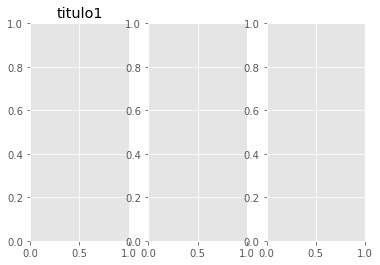

In [16]:
fig, ax = plt.subplots(1,3)
ax[0].set_title('titulo1')

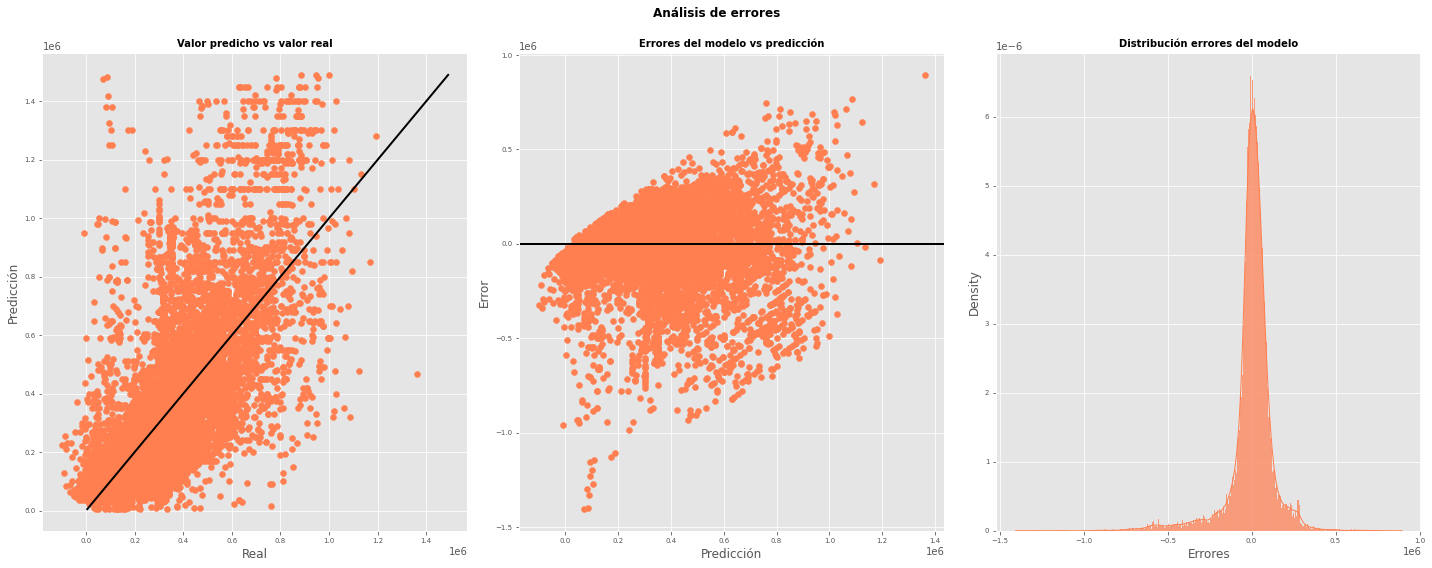

In [14]:
# Análisis visual de errores
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*

prediccion = modelo.predict(exog = X)
residuos   = prediccion - y

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

axes[0].scatter(prediccion,y, color = 'coral')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], color = 'black', lw=2)
axes[0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0].set_xlabel('Real')
axes[0].set_ylabel('Predicción')
axes[0].tick_params(labelsize = 7)

#---------------------------------------------------------------------------------------

axes[1].scatter(prediccion, residuos, color = 'coral')
axes[1].axhline(y = 0, color = 'black', lw=2)
axes[1].set_title('Errores del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Error')
axes[1].tick_params(labelsize = 7)

#---------------------------------------------------------------------------------------

sns.histplot(data    = residuos, stat  = "density", kde = True,line_kws= {'linewidth': 1}, color = "coral",alpha   = 0.8, ax = axes[2])
axes[2].set_title('Distribución errores del modelo', fontsize = 10,fontweight = "bold")
axes[2].set_xlabel("Errores")
axes[2].tick_params(labelsize = 7)

#---------------------------------------------------------------------------------------
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Análisis de errores', fontsize = 12, fontweight = "bold");

In [15]:
# Métricas
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
estimadores = len(X.columns)
observaciones = len(y)
r2 = metrics.r2_score(y, prediccion)
adj_r2 = 1-(1-r2)*((observaciones-1)/(observaciones-estimadores-1))
print("R2: ", r2)
print("Adj R2: ",adj_r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, prediccion))
print('Mean Squared Error:', metrics.mean_squared_error(y, prediccion))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, prediccion)))

R2:  0.5978510644332022
Adj R2:  0.5966288568331477
Mean Absolute Error: 79623.11864238609
Mean Squared Error: 18460136149.499622
Root Mean Squared Error: 135868.0836307763


--------------

## Regularización

In [16]:
# Subdividimos en train y test
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
X = df.drop(columns='price_aprox_usd')
y = df['price_aprox_usd']
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size   = 0.8, random_state = 1234)

-------------

## Regresión Ridge

In [17]:
model_ridge_cv = RidgeCV( alphas = np.logspace(-10, 2, 200), fit_intercept = True, normalize = True, cv=10)
model_ridge_cv = model_ridge_cv.fit(X_train, y_train)
print(model_ridge_cv.alpha_)
print(model_ridge_cv.best_score_)

0.001135733358343105
0.5945164800428802


In [18]:
# Predicciones
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
y_pred = model_ridge_cv.predict(X=X_test)
y_pred[:10]

array([[259287.67003266],
       [397572.77916242],
       [275605.21245996],
       [232324.7763952 ],
       [232352.12159574],
       [213101.01324937],
       [107479.17960162],
       [297528.13289486],
       [135441.00012571],
       [ 79245.8921316 ]])

In [19]:
# Métricas
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
estimadores = len(X_test.columns)
observaciones = len(y_test)
r2 = metrics.r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*((observaciones-1)/(observaciones-estimadores-1))
print("R2: ", r2)
print("Adj R2: ",adj_r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2:  0.5950103364147767
Adj R2:  0.5888532766035186
Mean Absolute Error: 79940.2732887464
Mean Squared Error: 19298934261.961937
Root Mean Squared Error: 138920.60416641564


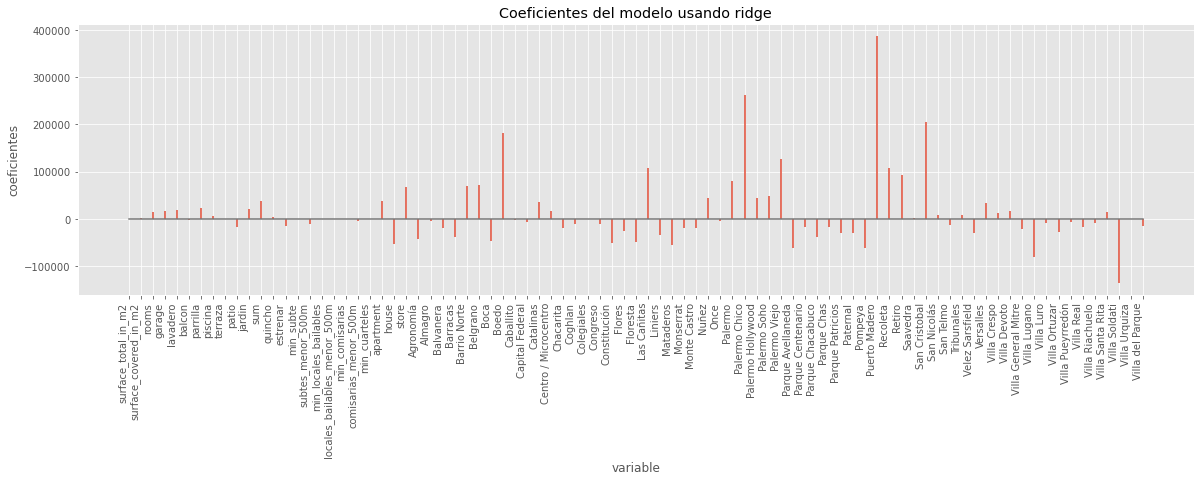

In [20]:
# Gráfica de coeficientes del modelo usando regresión ridge
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': model_ridge_cv.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo usando ridge');

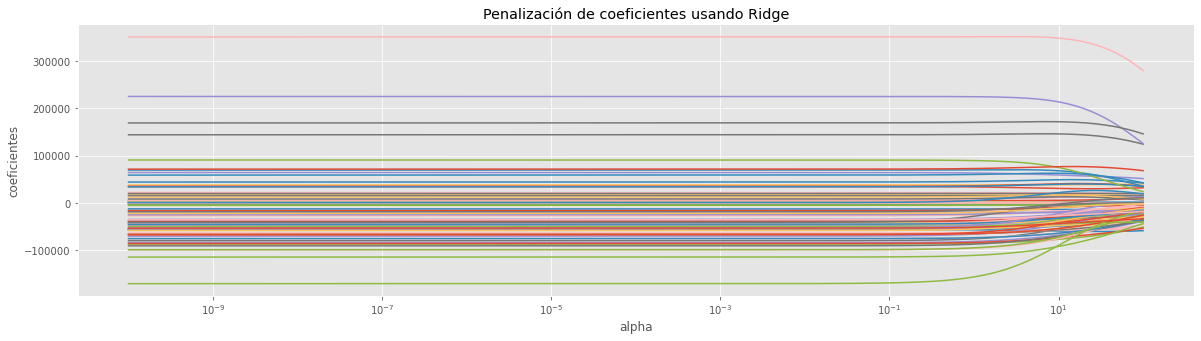

In [21]:
# Gráfica de penalización de modelos usando Ridge
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
alphas = model_ridge_cv.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Penalización de coeficientes usando Ridge');
plt.axis('tight')
plt.show()

## Regresión Lasso

In [22]:
model_lasso_cv = LassoCV(alphas = np.logspace(-10, 2, 200), fit_intercept = True, normalize = True, cv=10, max_iter=1e4)
model_lasso_cv = model_lasso_cv.fit(X_train, y_train)
print(model_lasso_cv.alpha_)
print(model_lasso_cv.score(X_train, y_train))

0.041987070844439055
0.5981250077951036


In [23]:
# Predicciones
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
y_pred = model_lasso_cv.predict(X=X_test)
y_pred[:10]

array([258711.67788244, 398777.81842681, 275793.97931319, 232028.96905691,
       232580.4188626 , 214518.14218141, 106536.54628008, 298245.08439863,
       135374.28669045,  78972.1383627 ])

In [24]:
# Métricas
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
estimadores = len(X_test.columns)
observaciones = len(y_test)
r2 = metrics.r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*((observaciones-1)/(observaciones-estimadores-1))
print("R2: ", r2)
print("Adj R2: ",adj_r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2:  0.5949400155348297
Adj R2:  0.5887818866348942
Mean Absolute Error: 79970.71903664776
Mean Squared Error: 19302285256.225163
Root Mean Squared Error: 138932.6644681702


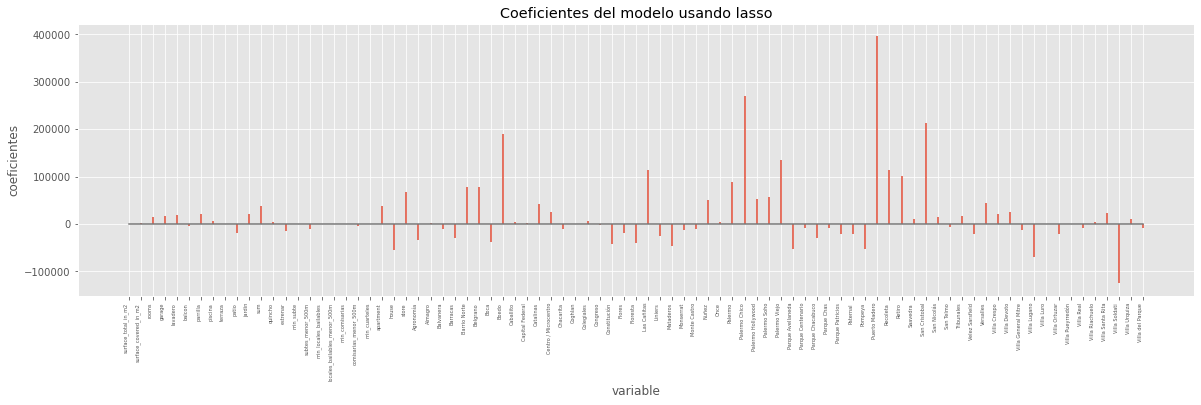

In [25]:
# Gráfica de coeficientes del modelo usando regresión lasso
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': model_lasso_cv.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo usando lasso');

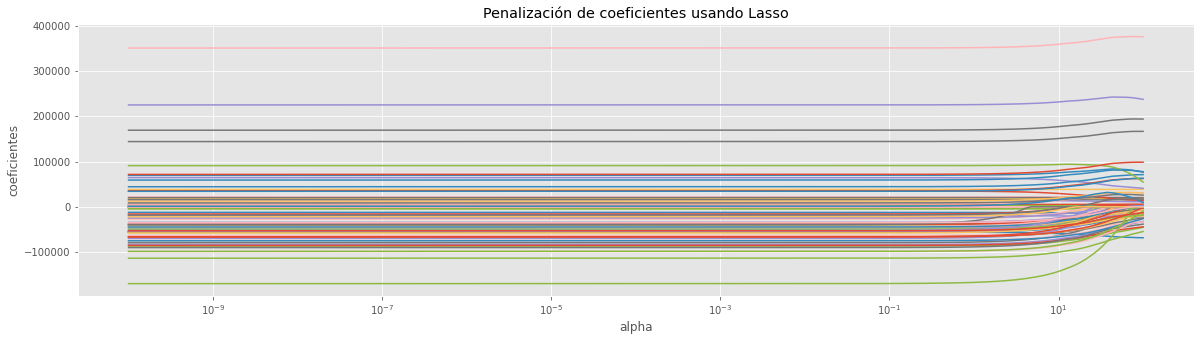

In [26]:
# Gráfica de penalización de modelos usando lasso
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
alphas = model_lasso_cv.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Penalización de coeficientes usando Lasso');
plt.axis('tight')
plt.show()

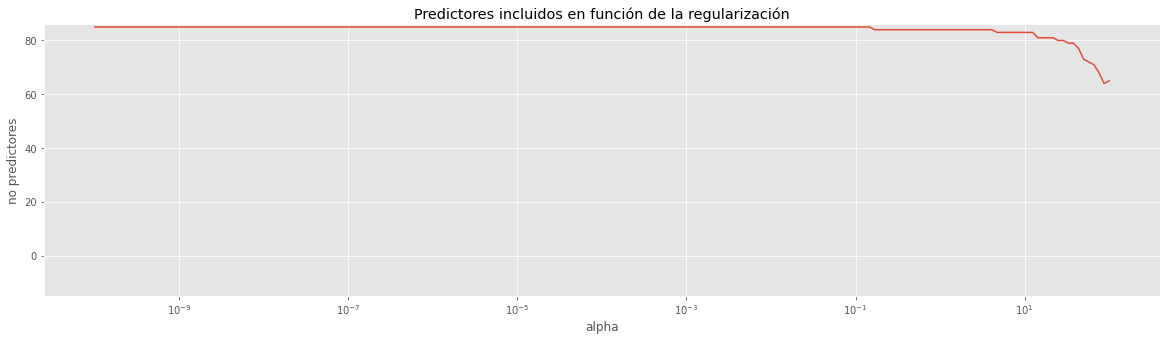

In [27]:
# Gráfica de número de estimadores usando lasso
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
alphas = model_lasso_cv.alphas
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('no predictores')
ax.set_title('Predictores incluidos en función de la regularización');

-------------------

## Regresión Elastic Net

In [28]:
model_elastic_cv = ElasticNetCV(l1_ratio = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],alphas  = np.logspace(-10, 3, 200),normalize = True, cv = 10)
model_elastic_cv = model_elastic_cv.fit(X = X_train, y = y_train)

In [29]:
# Predicciones
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
y_pred = model_elastic_cv.predict(X=X_test)
y_pred[:10]

array([259320.76059661, 397480.22400042, 275593.09695791, 232339.83201673,
       232345.01329596, 213027.70600999, 107539.34534084, 297485.90138577,
       135441.75692478,  79285.83857364])

In [30]:
# Métricas
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
estimadores = len(X_test.columns)
observaciones = len(y_test)
r2 = metrics.r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*((observaciones-1)/(observaciones-estimadores-1))
print("R2: ", r2)
print("Adj R2: ",adj_r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2:  0.5950155770867003
Adj R2:  0.5888585969494027
Mean Absolute Error: 79938.56373747591
Mean Squared Error: 19298684528.716785
Root Mean Squared Error: 138919.70532907412


In [31]:
mean_error_cv = model_elastic_cv.mse_path_.mean(axis =2)

df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [model_elastic_cv.l1_ratio, model_elastic_cv.alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

,l1_ratio,modelo.alphas_,mse_cv,rmse_cv
942,0.90,5.291979e-07,1.841989e+10,135719.892910
749,0.70,1.846425e-07,1.841989e+10,135719.896912
157,0.00,5.542665e-08,1.841989e+10,135719.897055
1137,0.95,1.122668e-06,1.841989e+10,135719.901116
553,0.50,1.011638e-07,1.841989e+10,135719.903161
...,...,...,...,...
400,0.50,1.000000e+03,4.546562e+10,213226.689864
600,0.70,1.000000e+03,4.546562e+10,213226.691412
800,0.90,1.000000e+03,4.546562e+10,213226.694369
1000,0.95,1.000000e+03,4.546562e+10,213226.696447


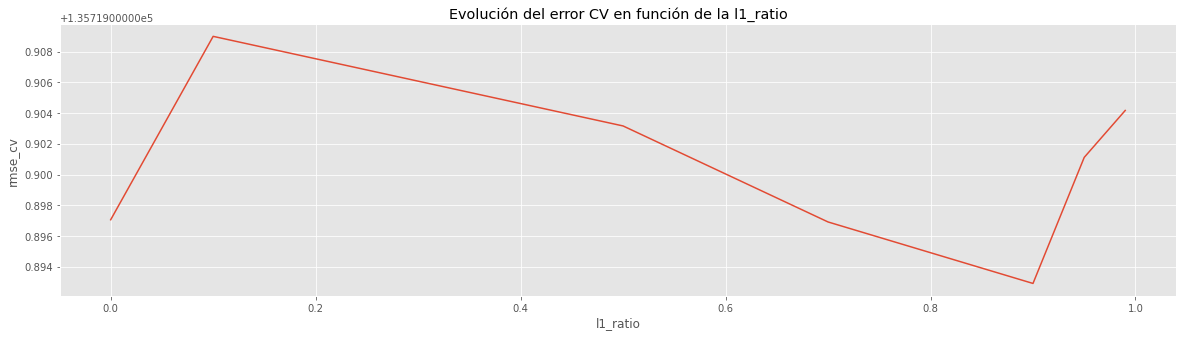

In [32]:
fig, ax = plt.subplots(figsize=(20, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

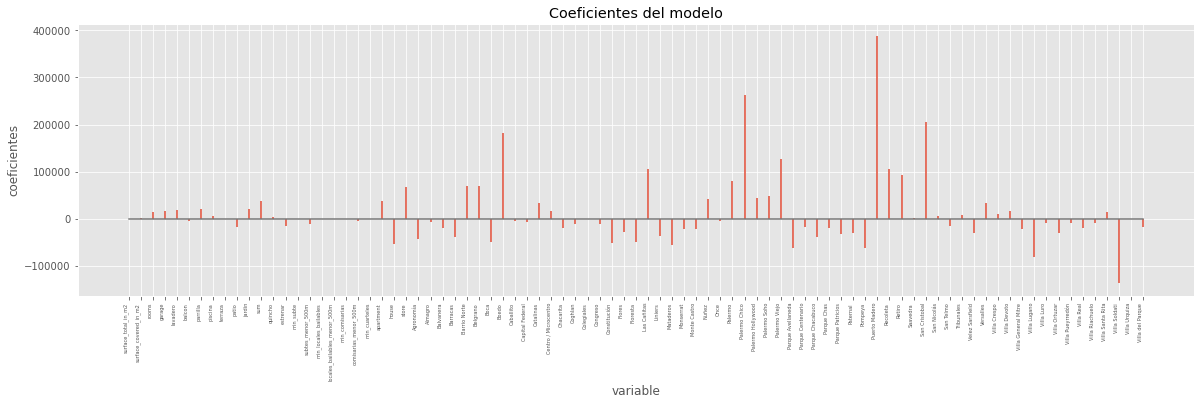

In [33]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': model_elastic_cv.coef_.flatten()})
fig, ax = plt.subplots(figsize=(20, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

-------

## Resumen

In [34]:
modelo_ols = sm.OLS(y, X).fit()
y_pred_ols = modelo_ols.predict(exog = X)
y_pred_ridge = model_ridge_cv.predict(X=X_test)
y_pred_lasso = model_lasso_cv.predict(X=X_test)
y_pred_elastic = model_elastic_cv.predict(X=X_test)

In [35]:
r2 = metrics.r2_score(y_test, y_pred)

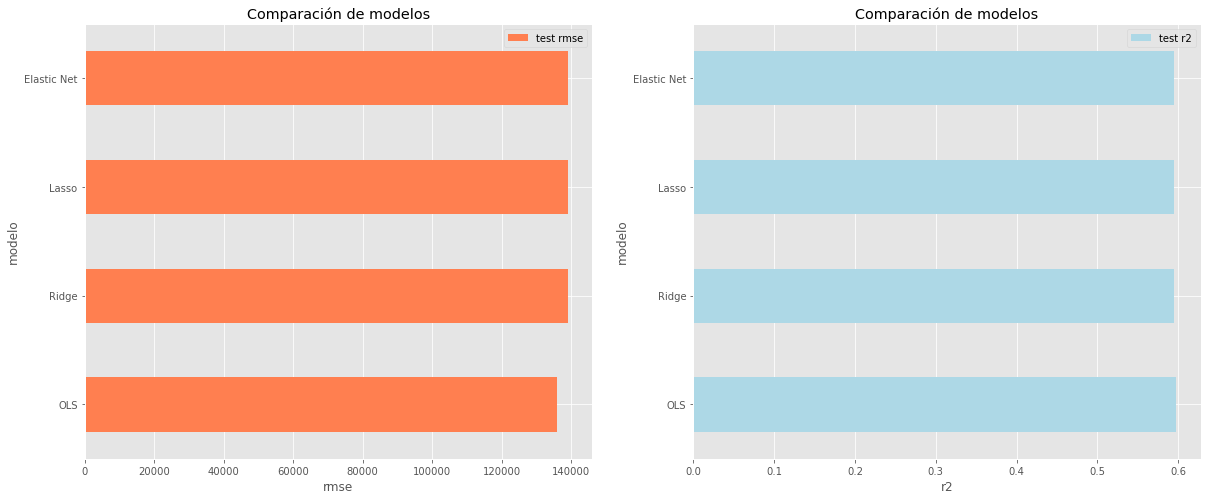

In [36]:
rmse_ols = np.sqrt(metrics.mean_squared_error(y, y_pred_ols))
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
rmse_elastic = np.sqrt(metrics.mean_squared_error(y_test, y_pred_elastic))
df_comparacion_rmse = pd.DataFrame({ 'modelo': ['OLS','Ridge', 'Lasso', 'Elastic Net'],'test rmse': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic]})
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
r2_ols = metrics.r2_score(y, y_pred_ols)
r2_ridge = metrics.r2_score(y_test, y_pred_ridge)
r2_lasso = metrics.r2_score(y_test, y_pred_lasso)
r2_elastic = metrics.r2_score(y_test, y_pred_elastic)
df_comparacion_r2 = pd.DataFrame({ 'modelo': ['OLS','Ridge', 'Lasso', 'Elastic Net'],'test r2': [r2_ols, r2_ridge, r2_lasso, r2_elastic]})
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
df_comparacion_rmse.set_index('modelo').plot(kind='barh',  color = 'coral', ax = axes[0])
axes[0].set_xlabel('rmse')
axes[0].set_ylabel('modelo')
axes[0].set_title('Comparación de modelos');
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
df_comparacion_r2.set_index('modelo').plot(kind='barh',  color = 'lightblue', ax = axes[1])
axes[1].set_xlabel('r2')
axes[1].set_ylabel('modelo')
axes[1].set_title('Comparación de modelos');

##### Los mejores resultados los obtenemos usando statmodels

-----------

## Interacciones

### Intentaremos agregar interacciones para lograr una mejor performance del modelo

##### Usamos surface_covered_in_m2 al cuadrado para la primera interacción

In [37]:
# usamos surface_covered_in_m2 al cudrado subdividimos en train y test
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
X = df.drop(columns='price_aprox_usd')
X['surface_covered_in_m2_2'] = X['surface_covered_in_m2']**2
y = df['price_aprox_usd']
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size   = 0.8, random_state = 1234)

In [38]:
# Entrenamiento del modelo
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

In [39]:
# Predicciones
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
y_pred = modelo.predict(X=X_test)
y_pred[:10]

array([[257362.69674265],
       [419116.37926012],
       [307625.31681749],
       [224276.24191235],
       [253004.01153112],
       [214435.71940984],
       [113693.29739523],
       [339430.72265409],
       [123534.20789887],
       [ 68104.90219678]])

In [40]:
# Métricas
# =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
estimadores = len(X_test.columns)
observaciones = len(y_test)
r2 = metrics.r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*((observaciones-1)/(observaciones-estimadores-1))
print("R2: ", r2)
print("Adj R2: ",adj_r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2:  0.606429720115631
Adj R2:  0.6003747927327946
Mean Absolute Error: 79304.28048530062
Mean Squared Error: 18754767446.92783
Root Mean Squared Error: 136948.04652468697


##### *****Usando esta interacción observamos una mejora en las métricas, hasta ahora es el mejor performance del modelo que tenemos

--------------

### Usamos interacciones múltiples

Guardamos la matriz de features original para volver a reestablecerla mientras hacemos pruebas

In [41]:
X_original = X[['surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'garage',
       'lavadero', 'balcon', 'parrilla', 'piscina', 'terraza', 'patio',
       'jardin', 'sum', 'quincho', 'estrenar', 'min_subte',
       'subtes_menor_500m', 'min_locales_bailables',
       'locales_bailables_menor_500m', 'min_comisarias',
       'comisarias_menor_500m', 'min_cuarteles', 'apartment', 'house', 'store',
       'Agronomía', 'Almagro', 'Balvanera', 'Barracas', 'Barrio Norte',
       'Belgrano', 'Boca', 'Boedo', 'Caballito', 'Capital Federal',
       'Catalinas', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
       'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Palermo Chico', 'Palermo Hollywood',
       'Palermo Soho', 'Palermo Viejo', 'Parque Avellaneda',
       'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero', 'Recoleta',
       'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás', 'San Telmo',
       'Tribunales', 'Velez Sarsfield', 'Versalles', 'Villa Crespo',
       'Villa Devoto', 'Villa General Mitre', 'Villa Lugano', 'Villa Luro',
       'Villa Ortuzar', 'Villa Pueyrredón', 'Villa Real', 'Villa Riachuelo',
       'Villa Santa Rita', 'Villa Soldati', 'Villa Urquiza',
       'Villa del Parque']].copy()

X_original.shape

(28384, 85)

In [42]:
X = X_original.copy()

In [43]:
features = X.columns
features

Index(['surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'garage',
       'lavadero', 'balcon', 'parrilla', 'piscina', 'terraza', 'patio',
       'jardin', 'sum', 'quincho', 'estrenar', 'min_subte',
       'subtes_menor_500m', 'min_locales_bailables',
       'locales_bailables_menor_500m', 'min_comisarias',
       'comisarias_menor_500m', 'min_cuarteles', 'apartment', 'house', 'store',
       'Agronomía', 'Almagro', 'Balvanera', 'Barracas', 'Barrio Norte',
       'Belgrano', 'Boca', 'Boedo', 'Caballito', 'Capital Federal',
       'Catalinas', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
       'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Palermo Chico', 'Palermo Hollywood',
       'Palermo Soho', 'Palermo Viejo', 'Parque Avellaneda',
       'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Pompeya', 'Pu

Desglozamos los nombres de las columnas


In [44]:
amenities = ['rooms', 'garage','lavadero', 'balcon', 'parrilla', 'piscina', 'terraza', 'patio','jardin', 'sum', 'quincho', 'estrenar']
subtes = ['min_subte','subtes_menor_500m']
locales = ['locales_bailables_menor_500m', 'min_comisarias']
cuarteles = ['comisarias_menor_500m', 'min_cuarteles']
prop_type = ['apartment', 'house', 'store']
barrios = ['Agronomía', 'Almagro', 'Balvanera', 'Barracas', 'Barrio Norte',
        'Belgrano', 'Boca', 'Boedo', 'Caballito', 'Capital Federal',
       'Catalinas', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
       'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Palermo Chico', 'Palermo Hollywood',
       'Palermo Soho', 'Palermo Viejo', 'Parque Avellaneda',
       'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero', 'Recoleta',
       'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás', 'San Telmo',
       'Tribunales', 'Velez Sarsfield', 'Versalles', 'Villa Crespo',
       'Villa Devoto', 'Villa General Mitre', 'Villa Lugano', 'Villa Luro',
       'Villa Ortuzar', 'Villa Pueyrredón', 'Villa Real', 'Villa Riachuelo',
       'Villa Santa Rita', 'Villa Soldati', 'Villa Urquiza',
       'Villa del Parque']



### Interaccion de superficie cubierta con el resto de las features:

In [45]:
for feature in features:
       # Filtro superficie cubierta porque ya está hecha elevada al cuadrado más arriba
       if feature != 'surface_covered_in_m2':
              X[f'surface_covered_in_m2_{feature}'] = X['surface_covered_in_m2'] * X[feature]

In [46]:
X.columns

Index(['surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'garage',
       'lavadero', 'balcon', 'parrilla', 'piscina', 'terraza', 'patio',
       ...
       'surface_covered_in_m2_Villa Lugano',
       'surface_covered_in_m2_Villa Luro',
       'surface_covered_in_m2_Villa Ortuzar',
       'surface_covered_in_m2_Villa Pueyrredón',
       'surface_covered_in_m2_Villa Real',
       'surface_covered_in_m2_Villa Riachuelo',
       'surface_covered_in_m2_Villa Santa Rita',
       'surface_covered_in_m2_Villa Soldati',
       'surface_covered_in_m2_Villa Urquiza',
       'surface_covered_in_m2_Villa del Parque'],
      dtype='object', length=169)

### Interaccion de superficie total con el resto de las features:

In [47]:
for feature in features:
       #Para no crear dos veces la misma columna filtramos tmb superficie total.
       if (feature != 'surface_covered_in_m2') and (feature != 'surface_total_in_m2'):
              X[f'surface_total_in_m2{feature}'] = X['surface_total_in_m2'] * X[feature]

### Interaccion Tipo de Propiedad con Amenities:

In [48]:
for prop in prop_type:
    for ameniti in amenities:
        X[f'{prop}_{ameniti}'] = X[prop] * X[ameniti]

### Interaccion Tipo de Propiedad con Barrios:

In [49]:
for prop in prop_type:
    for barrio in barrios:
        X[f'{prop}_{barrio}'] = X[prop] * X[barrio]

In [50]:
X.columns

Index(['surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'garage',
       'lavadero', 'balcon', 'parrilla', 'piscina', 'terraza', 'patio',
       ...
       'store_Villa Lugano', 'store_Villa Luro', 'store_Villa Ortuzar',
       'store_Villa Pueyrredón', 'store_Villa Real', 'store_Villa Riachuelo',
       'store_Villa Santa Rita', 'store_Villa Soldati', 'store_Villa Urquiza',
       'store_Villa del Parque'],
      dtype='object', length=471)

## LassoCV 

Para que nos lleve a cero los coeficientes que no nos interese y para evitar colinealidad

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size   = 0.8, random_state = 1234)

model_lasso_cv = LassoCV(alphas = np.logspace(-10, 2, 200), fit_intercept = True, normalize = True, cv=10, max_iter=1e4)
model_lasso_cv = model_lasso_cv.fit(X_train, y_train)
print(model_lasso_cv.alpha_)
print(model_lasso_cv.score(X_train, y_train))
print(model_lasso_cv.score(X_test, y_test))

2.7049597304631314
0.7140098222230273
0.7068016323071056


In [52]:
relevant_coef = X.columns[model_lasso_cv.coef_ != 0]
print(relevant_coef)

Index(['surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'garage',
       'lavadero', 'parrilla', 'piscina', 'terraza', 'patio', 'jardin',
       ...
       'store_San Telmo', 'store_Tribunales', 'store_Velez Sarsfield',
       'store_Villa Crespo', 'store_Villa Devoto', 'store_Villa Lugano',
       'store_Villa Ortuzar', 'store_Villa Real', 'store_Villa Urquiza',
       'store_Villa del Parque'],
      dtype='object', length=253)


In [54]:
print(f'Tenemos {relevant_coef.size} coeficientes relevantes')

Tenemos 253 coeficientes relevantes
